In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_keys
from datetime import datetime
from scipy.stats import linregress

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, 1500)
lngs = np.random.uniform(-180.000, 180.000, 1500)
lats_lngs = zip(lats,lngs)

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
print(f'The number of cities found: {len(cities)}.')
    

The number of cities found: 623.


In [8]:
# Create an empty list to hold the weather data.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys
city_data =[]
# Print the beginning of the logging.
print("Beginning Data Retrieval     \n")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    #Group cities in sets of 50 for loggin purposes.
    if (i%50==0 and i>=50):
        set_count+=1
        record_count =1
# Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(' ','+')
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
         # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print(f'{city} not found. Skipping...')
        pass
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     

-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | marawi
Processing Record 3 of Set 1 | broken hill
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | indianola
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | attawapiskat
attawapiskat not found. Skipping...
Processing Record 11 of Set 1 | dwarka
Processing Record 12 of Set 1 | san quintin
Processing Record 13 of Set 1 | lekoni
Processing Record 14 of Set 1 | karacakoy
Processing Record 15 of Set 1 | colares
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | general roca
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | alangayam
Processing Record 21 of Set 1 | torbay
Processing Record 22 of Set 1 | bredasd

In [9]:
len(city_data)

572

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,59.00,58,20,16.11,AU,2020-09-28 04:03:10
1,Marawi,8.00,124.29,84.99,76,97,4.00,PH,2020-09-28 04:07:33
2,Broken Hill,-31.95,141.43,64.40,34,43,10.29,AU,2020-09-28 04:07:34
3,East London,-33.02,27.91,48.20,81,1,6.93,ZA,2020-09-28 04:07:34
4,Butaritari,3.07,172.79,81.70,79,1,15.46,KI,2020-09-28 04:07:35
5,Castro,-24.79,-50.01,63.86,81,100,5.10,BR,2020-09-28 04:07:36
6,Indianola,41.36,-93.56,53.01,92,89,8.48,US,2020-09-28 04:07:36
7,Jamestown,42.10,-79.24,64.40,77,1,8.05,US,2020-09-28 04:05:08
8,Barrow,71.29,-156.79,32.00,96,90,10.29,US,2020-09-28 04:07:37
9,Dwarka,22.24,68.97,83.08,61,18,6.71,IN,2020-09-28 04:05:29


In [11]:
new_column_order = ['City','Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df =city_data_df[new_column_order]

In [12]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
city_data_df.to_csv(output_data_file, index_label ='City_ID')

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

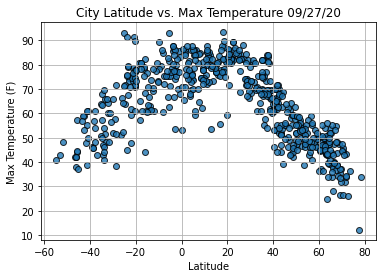

In [14]:
# Get today's data
import time
today=time.strftime('%x')
#Build Scatter plots for latitude vs. max temperature.
fig, ax = plt.subplots()
ax.scatter(lats, max_temps, 
          edgecolor='black', linewidth =1, marker='o',
          alpha=0.8, label='Cities')
# Incorporate the other graph properties.
ax.set_title(f'City Latitude vs. Max Temperature '+today)
ax.set_ylabel('Max Temperature (F)')
ax.set_xlabel('Latitude')
ax.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

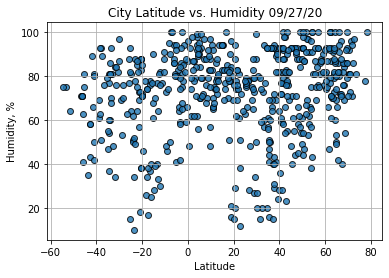

In [15]:
#Build Scatter plots for latitude vs. humidity.
fig, ax = plt.subplots()
ax.scatter(lats, humidity, 
          edgecolor='black', linewidth =1, marker='o',
          alpha=0.8, label='Cities')
# Incorporate the other graph properties.
ax.set_title(f'City Latitude vs. Humidity '+today)
ax.set_ylabel('Humidity, %')
ax.set_xlabel('Latitude')
ax.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

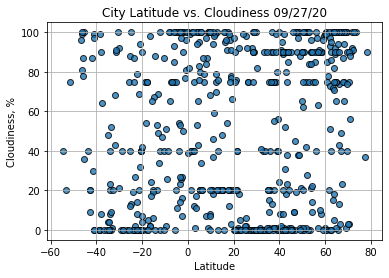

In [16]:
#Build Scatter plots for latitude vs. Cloudiness.
fig, ax = plt.subplots()
ax.scatter(lats, cloudiness, 
          edgecolor='black', linewidth =1, marker='o',
          alpha=0.8, label='Cities')
# Incorporate the other graph properties.
ax.set_title(f'City Latitude vs. Cloudiness '+today)
ax.set_ylabel('Cloudiness, %')
ax.set_xlabel('Latitude')
ax.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

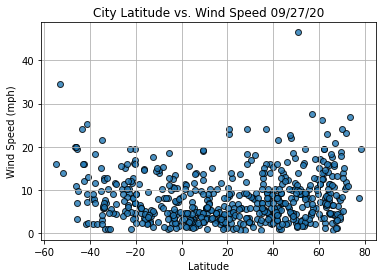

In [17]:
#Build Scatter plots for latitude vs. wind speed.
fig, ax = plt.subplots()
ax.scatter(lats, wind_speed, 
          edgecolor='black', linewidth =1, marker='o',
          alpha=0.8, label='Cities')
# Incorporate the other graph properties.
ax.set_title(f'City Latitude vs. Wind Speed '+today)
ax.set_ylabel('Wind Speed (mph)')
ax.set_xlabel('Latitude')
ax.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [35]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title,  y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_val, p_val, stderr) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values*slope+intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, c='red')
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [36]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

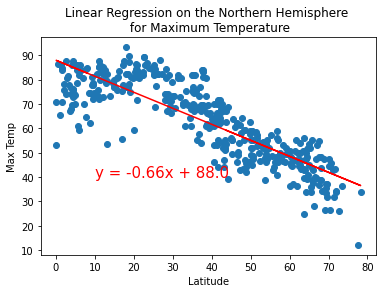

In [37]:
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp', (10,40))

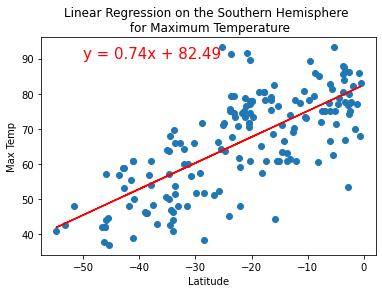

In [38]:
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp', (-50,90))

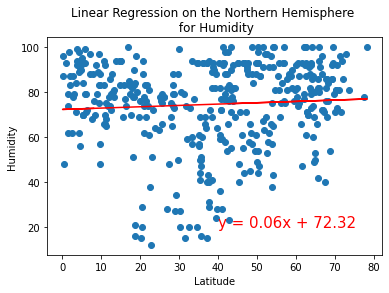

In [40]:
# Linear regression on the Northern Hemisphere for Humidity
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                       'Linear Regression on the Northern Hemisphere \n for Humidity',
                       'Humidity', (40,20))

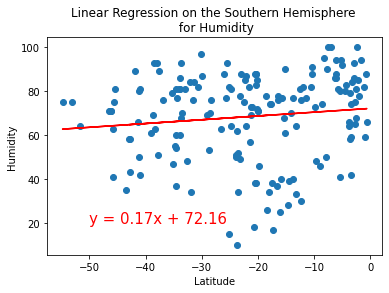

In [42]:
# Linear regression on the Southern Hemisphere for Humidity
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
                       'Linear Regression on the Southern Hemisphere \n for Humidity',
                       'Humidity', (-50,20))

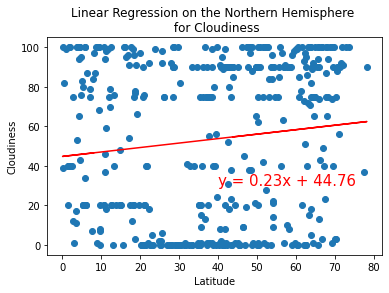

In [44]:
# Linear regression on the Northern Hemisphere for Humidity
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness',
                       'Cloudiness', (40,30))

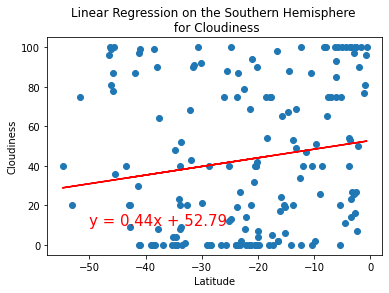

In [50]:
# Linear regression on the Southern Hemisphere for Humidity
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness',
                       'Cloudiness', (-50,10))

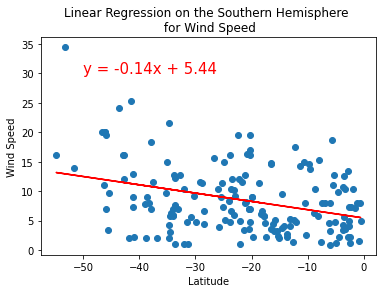

In [51]:
# Linear regression on the Southern Hemisphere for Wind Speed
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed', (-50,30))

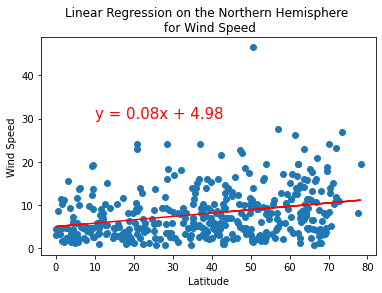

In [53]:
# Linear regression on the Northern Hemisphere for Wind Speed
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed', (10,30))